Tau_mode
( finding D_gamma/dq_2)

In [3]:
#for tau mode
import numpy as np
from sympy import Symbol, integrate, sqrt, cos
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
m_D = 1.86486
m_B = 5.27955
m_b = 4.18
m_c = 1.275
m_tau = 1.77686
r = m_D/m_B
# Values of a-0_i's
a_0_0 = 0.01140
a_0_1 = -0.0590
a_0_2 = 0.19
a_0_3 = -0.03

# Values of a_1_i's
a_1_0 = 0.01261
a_1_1 = -0.0963
a_1_2 = 0.37
a_1_3 = -0.05

# Values of phi's
phi_0 = 0.5299
phi_1 = 1.1213

#setting values of C's
C_V_LL = 0
C_V_RL = 0
C_S_RL = 0
C_S_LL = 0
C_T_LL = 0
C_V_LR = 0
C_V_RR = 0
C_S_RR = 0
C_S_LR = 0
C_T_RR = 0

#print(C_S_LR)

# Spacing and defining range
q_2 = np.linspace(m_tau**2, (m_B - m_D)**2, 10000)
#q_0 = np.sqrt(q_2)


def D_gamma(q_2):
  z = (np.sqrt((m_B+m_D)**2-q_2) - np.sqrt(4*m_B*m_D)) / (np.sqrt((m_B+m_D)**2-q_2) + np.sqrt(4*m_B*m_D))

  #phi's
  Phi_0 = phi_0 * (1+z) * (1-z)**(3/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(4)
  Phi_1 = phi_1 * (1+z)**2 * (1-z)**(1/2)/((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(5)

  #f's
  f_0 = (a_0_0 + a_0_1 * z + a_0_2 * z**2 + a_0_3 * z**3)/(Phi_0)
  f_1 = (a_1_0 + a_1_1 * z + a_1_2 * z**2 + a_1_3 * z**3)/(Phi_1)

  #lamda
  lamda_D = m_B**4 + m_D**4 + q_2**2 - 2 * m_B**2 * m_D**2 - 2 * m_D**2 * q_2 - 2 * m_B**2 * q_2

  #h's factor
  H_s_V0 = np.sqrt(lamda_D/q_2) * f_1
  H_s_Vt = ((m_B**2-m_D**2)/np.sqrt(q_2)) * f_0

  #for time being in B to D
  H_s_T = 0
  H_s_S = 0

  #A's factor
  A_L_0 = (1 + C_V_LL + C_V_RL) * H_s_V0
  A_L_T = 2 * (C_T_LL) * H_s_T
  A_L_t = (1 + C_V_LL + C_V_RL) * H_s_Vt
  A_L_S = (C_S_RL + C_S_LL) * H_s_S
  A_R_0 = (C_V_LR + C_V_RR) * H_s_V0
  A_R_t = (C_V_LR + C_V_RR) * H_s_Vt
  A_R_S = (C_S_RR + C_S_LR) * H_s_S
  A_R_T = 2 * C_T_RR * H_s_T

  #J's
#  J_2_L = -(1-(m_tau**2/np.sqrt(q_2))) * (abs(((A_L_0))**2) - 4 * abs((A_L_T)**2))
#  J_2_R = -(1-(m_tau**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
#  J_2 = J_2_L + J_2_R #final

#  J_0_L = abs((A_L_0 - (2*m_tau/np.sqrt(q_2))*A_L_T)**2) + (m_tau**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_tau) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_tau/np.sqrt(q_2))*A_R_T)**2) + (m_tau**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_tau) * A_R_S)**2)
#  J_0 = J_0_L + J_0_R  # the 2nd final

  #J's
  J_2_L = -(1-(m_tau**2/(q_2))) * ((abs(A_L_0))**2 - 4 * (abs(A_L_T))**2)  #new
  J_2_R = -(1-(m_tau**2/(q_2))) * ((abs(A_R_0))**2 - 4 * (abs(A_R_T))**2)  #new
#  J_2_R = -(1-(m_e**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
  J_2 = J_2_L + J_2_R #final

  J_0_L = (abs(A_L_0-(2*m_tau/np.sqrt(q_2))*A_L_T))**2 + (m_tau**2/q_2) * (abs(A_L_t  + (np.sqrt(q_2)/m_tau) * A_L_S))**2  #new
  J_0_R = (abs(A_R_0-(2*m_tau/np.sqrt(q_2))*A_R_T))**2 + (m_tau**2/q_2) * (abs(A_R_t  + (np.sqrt(q_2)/m_tau) * A_R_S))**2  #new
#  J_0_L = abs((A_L_0 - (2*m_e/np.sqrt(q_2))*A_L_T)**2) + (m_e**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_e) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_e/np.sqrt(q_2))*A_R_T)**2) + (m_e**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_e) * A_R_S)**2)
  J_0 = J_0_L + J_0_R  # the 2nd final

  # factor in front
  alpha = ((G_F**2 * V_cb**2)/(256*m_B**3*np.pi**3)) * q_2 * np.sqrt(lamda_D) * (1-(m_tau**2/q_2))**2

  D_gamma = alpha * (2 * J_0 + (2/3) * J_2)
  return D_gamma

print(D_gamma(q_2))










[0.00000000e+00 3.09369838e-22 1.23650755e-21 ... 6.97410485e-18
 4.93018534e-18 9.08137981e-24]


Plotting(B to D-tau_mode)

4.331797235023042e-13


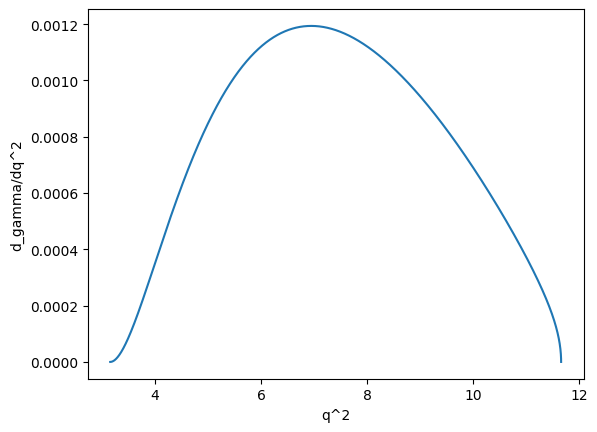

In [4]:
#plotting

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma(q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()


tau_mode (integration of D_gamma/dq_2)

In [5]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_tau**2)
q_2_n = float((m_B - m_D)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_taumode = result/tau_total
print(D_B_R_taumode)




2.8707527169174616e-15
0.00662716318692648


Electron_mode
(finding D_gamma/dq_2)

In [6]:
# for electron mode
import numpy as np
import sympy as sp
import cmath
from sympy import Symbol, integrate, sqrt, cos
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
m_D = 1.86486
m_B = 5.27955
m_b = 4.18
m_c = 1.275
#m_tau = 1.77686
m_e = 0.000511
r=m_D/m_B
print(r)
# Values of a-0_i's
a_0_0 = 0.01140
a_0_1 = -0.0590
a_0_2 = 0.19
a_0_3 = -0.03

# Values of a_1_i's
a_1_0 = 0.01261
a_1_1 = -0.0963
a_1_2 = 0.37
a_1_3 = -0.05

# Values of phi's
phi_0 = 0.5299
phi_1 = 1.1213

#setting values of C's
C_V_LL = 0
C_V_RL = 0
C_S_RL = 0
C_S_LL = 0
C_T_LL = 0
C_V_LR = 0
C_V_RR = 0
C_S_RR = 0
C_S_LR = 0
C_T_RR = 0

#print(C_S_LR)

# Spacing and defining range
q_2 = np.linspace(m_e**2, (m_B - m_D)**2, 10000)
#q_0 = np.sqrt(q_2)


def D_gamma(q_2):
  z = (np.sqrt((m_B+m_D)**2-q_2) - np.sqrt(4*m_B*m_D)) / (np.sqrt((m_B+m_D)**2-q_2) + np.sqrt(4*m_B*m_D))

  #phi's
  Phi_0 = phi_0 * (1+z) * (1-z)**(3/2) / ((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(4)
  Phi_1 = phi_1 * (1+z)**2 * (1-z)**(1/2) / ((1+r)*(1-z)+2*np.sqrt(r)*(1+z))**(5)

  #f's
  f_0 = (a_0_0 + a_0_1 * z + a_0_2 * z**2 + a_0_3 * z**3)/(Phi_0)
  f_1 = (a_1_0 + a_1_1 * z + a_1_2 * z**2 + a_1_3 * z**3)/(Phi_1)

  #lamda
  lamda_D = m_B**4 + m_D**4 + q_2**2 - 2 * m_B**2 * m_D**2 - 2 * m_D**2 * q_2 - 2 * m_B**2 * q_2

  #h's factor
  H_s_V0 = np.sqrt(lamda_D/q_2) * f_1
  H_s_Vt = ((m_B**2-m_D**2)/np.sqrt(q_2)) * f_0

  #for time being in B to D
  H_s_T = 0
  H_s_S = 0

  #A's factor
  A_L_0 = (1 + C_V_LL + C_V_RL) * H_s_V0
  A_L_T = 2 * (C_T_LL) * H_s_T
  A_L_t = (1 + C_V_LL + C_V_RL) * H_s_Vt
  A_L_S = (C_S_RL + C_S_LL) * H_s_S
  A_R_0 = (C_V_LR + C_V_RR) * H_s_V0
  A_R_t = (C_V_LR + C_V_RR) * H_s_Vt
  A_R_S = (C_S_RR + C_S_LR) * H_s_S
  A_R_T = 2 * C_T_RR * H_s_T

  #J's
  J_2_L = -(1-(m_e**2/(q_2))) * ((abs(A_L_0))**2 - 4 * (abs(A_L_T))**2)  #new
  J_2_R = -(1-(m_e**2/(q_2))) * ((abs(A_R_0))**2 - 4 * (abs(A_R_T))**2)  #new
#  J_2_R = -(1-(m_e**2/np.sqrt(q_2))) * (abs((A_R_0)**2) - 4 * abs((A_R_T)**2))
  J_2 = J_2_L + J_2_R #final

  J_0_L = (abs(A_L_0-(2*m_e/np.sqrt(q_2))*A_L_T))**2 + (m_e**2/q_2) * (abs(A_L_t  + (np.sqrt(q_2)/m_e) * A_L_S))**2  #new
  J_0_R = (abs(A_R_0-(2*m_e/np.sqrt(q_2))*A_R_T))**2 + (m_e**2/q_2) * (abs(A_R_t  + (np.sqrt(q_2)/m_e) * A_R_S))**2  #new
#  J_0_L = abs((A_L_0 - (2*m_e/np.sqrt(q_2))*A_L_T)**2) + (m_e**2/q_2) * abs((A_L_t + (np.sqrt(q_2)/m_e) * A_L_S)**2)
#  J_0_R = abs((A_R_0 - (2*m_e/np.sqrt(q_2))*A_R_T)**2) + (m_e**2/q_2) * abs((A_R_t + (np.sqrt(q_2)/m_e) * A_R_S)**2)
  J_0 = J_0_L + J_0_R  # the 2nd final

  # factor in front
  alpha = ((G_F**2 * V_cb**2)/(256*m_B**3*np.pi**3)) * q_2 * np.sqrt(lamda_D) * (1-(m_e**2/q_2))**2

  D_J = alpha * (2 * J_0 + (2/3) * J_2)
  D_gamma = sp.simplify(D_J)
  return D_gamma

print(D_gamma(q_2))

0.3532232860755178
[0.0, 1.68683808143046e-15, 1.68667456403384e-15, 1.68651337257721e-15, 1.6863527773314e-15, 1.68619242201228e-15, 1.68603218642086e-15, 1.6858720186904e-15, 1.68571189277113e-15, 1.6855517941445e-15, 1.68539171407812e-15, 1.68523164700417e-15, 1.6850715892047e-15, 1.68491153810207e-15, 1.68475149185276e-15, 1.68459144910317e-15, 1.68443140883695e-15, 1.68427137027592e-15, 1.6841113328141e-15, 1.68395129597246e-15, 1.68379125936724e-15, 1.68363122268729e-15, 1.68347118567762e-15, 1.6833111481272e-15, 1.6831511098598e-15, 1.68299107072706e-15, 1.68283103060312e-15, 1.68267098938049e-15, 1.68251094696674e-15, 1.6823509032819e-15, 1.68219085825643e-15, 1.6820308118295e-15, 1.68187076394765e-15, 1.68171071456368e-15, 1.6815506636357e-15, 1.68139061112641e-15, 1.68123055700242e-15, 1.68107050123378e-15, 1.68091044379346e-15, 1.68075038465704e-15, 1.68059032380234e-15, 1.68043026120916e-15, 1.68027019685907e-15, 1.68011013073514e-15, 1.67995006282186e-15, 1.67978999310488e

Plotting for electron_mode(D_gamma/dq_2)

4.331797235023042e-13


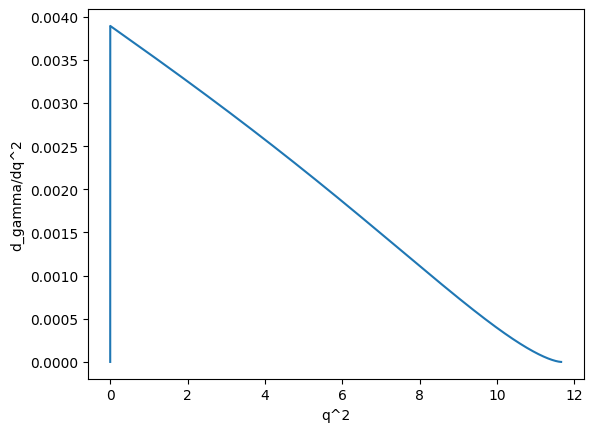

In [7]:
#plotting

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma(q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()


Integrating D_gamma\dq_2 (electron_mode)

In [8]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_e**2)
q_2_n = float((m_B - m_D)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_emode = result/tau_total
print(D_B_R_emode)
#D_B_R_taumode = 0.00662716318692648

9.59513633272653e-15
0.0221504743000176


Differential Branching ratio (tau_mode)

In [9]:
#DBR for tau_mode
print(D_B_R_taumode)

0.00662716318692648


Differential Branching ratio (e_mode)

In [10]:
#DBR for e_mode
print(D_B_R_emode)

0.0221504743000176


Branching Fraction (R_D)

In [11]:
R_D = D_B_R_taumode/D_B_R_emode
print(R_D)

0.299188319724657
